
## Data Preparation and Quality Assessment




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
# Add new columns for departure and arrival city
df['departure_city'] = df['route'].apply(lambda x: x[:3])
df['arrival_city'] = df['route'].apply(lambda x: x[3:])

In [6]:
# Convert binary variables to categorical for summary
binary_columns = ['wants_extra_baggage', 'wants_preferred_seat', 'flight_day', 'wants_in_flight_meals',
                  'booking_complete']
for col in binary_columns:
    df[col] = df[col].astype('category')
df.describe(include='category')

,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
count,50000,50000,50000,50000,50000
unique,7,2,2,2,2
top,Mon,1,0,0,0
freq,8102,33439,35152,28643,42522


In [7]:
df.describe(include = 'number')

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,7.277561
std,1.020165,90.451378,33.88767,5.41266,1.496863
min,1.000000,0.000000,0.00000,0.00000,4.670000
25%,1.000000,21.000000,5.00000,5.00000,5.620000
50%,1.000000,51.000000,17.00000,9.00000,7.570000
75%,2.000000,115.000000,28.00000,13.00000,8.830000
max,9.000000,867.000000,778.00000,23.00000,9.500000


In [8]:
df[['sales_channel', 'trip_type', 'booking_origin', 'departure_city',
    'arrival_city']].describe()

,sales_channel,trip_type,booking_origin,departure_city,arrival_city
count,50000,50000,50000,50000,50000
unique,2,3,104,85,64
top,Internet,RoundTrip,Australia,DMK,SYD
freq,44382,49497,17872,3747,6616


According to the summary, there are **49,497** round trips (`trip_type` column) i.e., approx. **99%** of the data is for round trip. In such cases, the trip_type feature might not contribute significantly to the predictive power of a machine learning model due to its lack of variability. The majority class (**RoundTrip**) dominates the dataset, providing little to no unique information that can be used for classification or prediction tasks. **Therefore, `trip_type` column can be removed from the dataset for training the model.**

<!-- We'll convert `purchase_lead` to categories and define the bins for purchase_lead as follows:
- 0-30 days as short
- 31-180 days as medium
- 181-365 days as long
- more than 365 days as very long lead time -->

In [9]:
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['time_of_day'] = pd.cut(df['flight_hour'], bins=bins, labels=labels, right=False)


In [10]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure_city,arrival_city,time_of_day
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL,Morning
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL,Night
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL,Afternoon
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL,Night
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL,Afternoon



## Exploratory Data Analysis


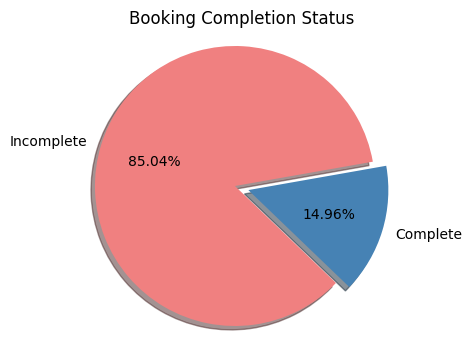

In [11]:
# Count the number of completed and not completed bookings
booking_counts = df['booking_complete'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
explode = (0.1, 0)
colors = ['lightcoral','steelblue']

plt.pie(booking_counts, labels=['Incomplete', 'Complete'],
        autopct='%1.2f%%', startangle=10, explode=explode,
        shadow=True, colors=colors)

plt.title('Booking Completion Status')
plt.axis('equal')
plt.show()


The observation that only **15%** of the customers have completed bookings indicates a significant class imbalance in the dataset. This imbalance must be carefully considered when splitting the data into training and test sets for predictive modeling, as it could heavily influence the model's accuracy.

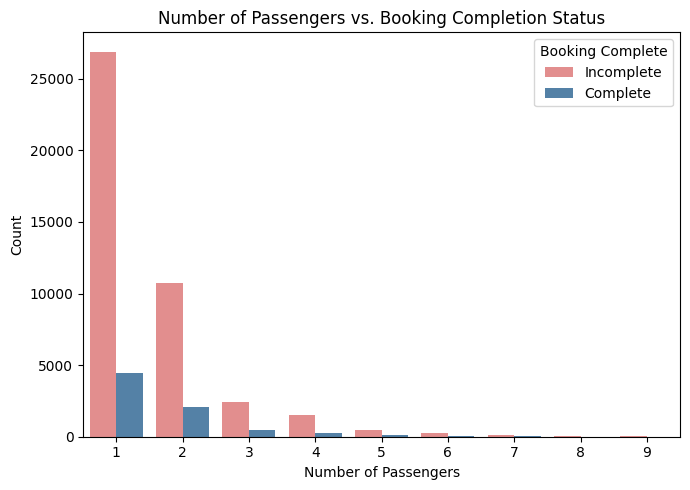

In [12]:
# Plot the number of passengers with booking completion status
plt.figure(figsize=(7, 5))
sns.countplot(x='num_passengers', hue='booking_complete', palette = colors, data=df)
plt.title('Number of Passengers vs. Booking Completion Status')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.legend(title='Booking Complete', labels=['Incomplete', 'Complete'])
plt.tight_layout()
plt.show()

<ipython-input-13-f51ade3f58a4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_of_day_counts = df.groupby(['time_of_day', 'booking_complete']).size().unstack(fill_value=0)


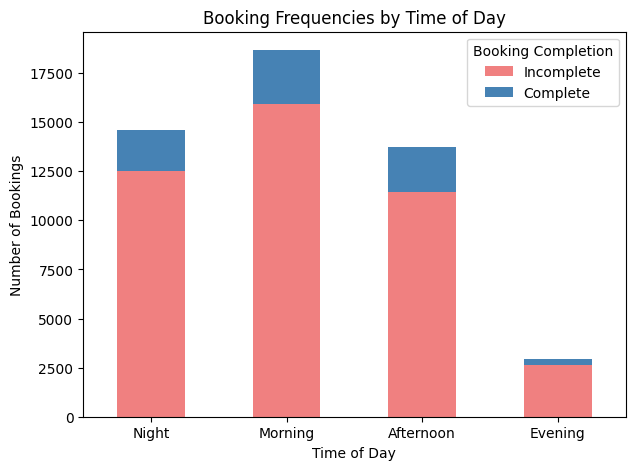

In [13]:
# Count the bookings for each time period in a day
time_of_day_counts = df.groupby(['time_of_day', 'booking_complete']).size().unstack(fill_value=0)

# Plot stacked bar chart
time_of_day_counts.plot(kind='bar', stacked=True, figsize=(7, 5), color = colors)

plt.title('Booking Frequencies by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Completion', labels=['Incomplete', 'Complete'])
plt.xticks(rotation=0)
plt.show()

<ipython-input-14-9c3a0035a957>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_booking_counts = df.groupby(['sales_channel', 'booking_complete']).size().unstack(fill_value=0)


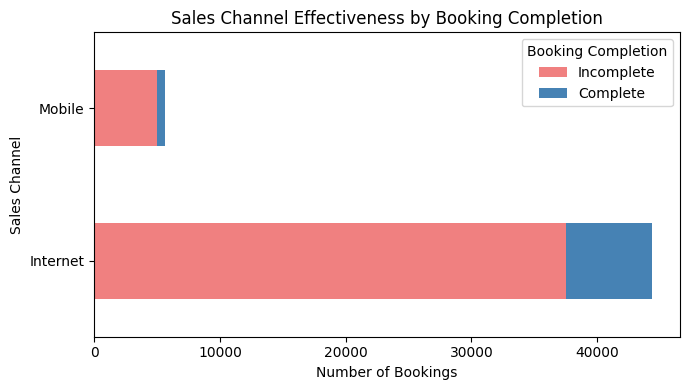

In [14]:
channel_booking_counts = df.groupby(['sales_channel', 'booking_complete']).size().unstack(fill_value=0)

# Plot horizontal stacked bar chart
channel_booking_counts.plot(kind='barh', stacked=True, figsize=(7, 4), color=colors)
plt.title('Sales Channel Effectiveness by Booking Completion')
plt.xlabel('Number of Bookings')
plt.ylabel('Sales Channel')
plt.legend(title='Booking Completion', labels=['Incomplete', 'Complete'])
plt.tight_layout()
plt.show()

In [15]:
# Calculate the percentage of each booking completion status for each sales channel
channel_booking_counts.div(channel_booking_counts.sum(axis=1), axis=0) * 100

booking_complete,0,1
sales_channel,,
Internet,84.523005,15.476995
Mobile,89.159843,10.840157


It is clear from the plot that the *Internet* sales channel has a significantly higher number of bookings compared to *Mobile*. Within the Internet channel, there is a notable portion of incomplete bookings, but the number of completed bookings is substantial. Similarly for the Mobile channel.

- For the "Internet" channel, approximately **15.47%** of bookings are completed.
- For the "Mobile" channel, approximately **10.84%** of bookings are completed.

Given these observations, it is plausible that the `sales_channel` variable may have a significant impact on booking completion. To confirm this, we will conduct statistical testing to assess whether there is a statistically significant difference in booking completion rates between these two sales channels.

<ipython-input-16-fd4e14f79fc6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_complete', y=col, data=df, palette=colors)
<ipython-input-16-fd4e14f79fc6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_complete', y=col, data=df, palette=colors)
<ipython-input-16-fd4e14f79fc6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_complete', y=col, data=df, palette=colors)


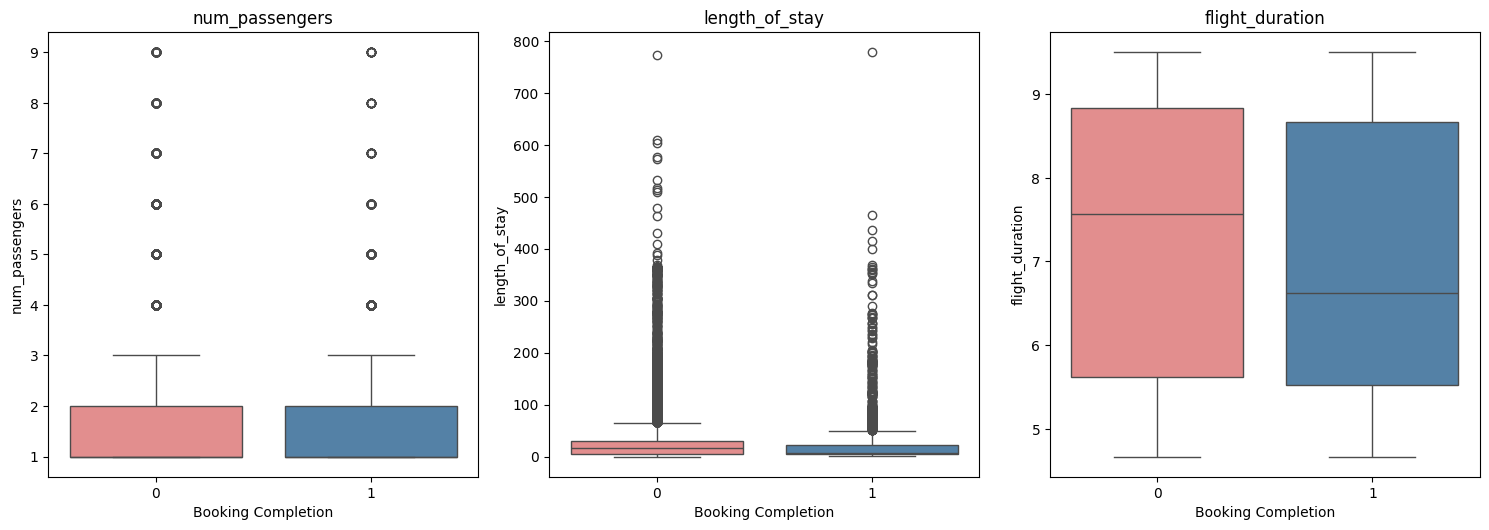

In [16]:
# Boxplots for Numerical Variables split by booking completion
numerical_columns = ['num_passengers', 'length_of_stay', 'flight_duration']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='booking_complete', y=col, data=df, palette=colors)
    plt.title(f'{col}')
    plt.xlabel('Booking Completion')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In the airline industry, it's common to allow round trip bookings up to one year in advance. However, in our dataset's `length_of_stay` column, there are entries indicating stays close to **800** days, which is significantly longer than the standard one-year timeframe. We will specifically investigate instances where the `length_of_stay` exceeds one year to better understand these anomalies and determine their relevance to our analysis.

In [17]:
len(df[df['length_of_stay']>365])

23

In our dataset, we found **23** rows where the `length_of_stay` is much higher than normal. Since these cases are rare and can distort our analysis, it makes sense to leave them out. This way, our results will more accurately reflect the common trends in the data without being skewed by a few unusual cases.

In [18]:
df = df[df['length_of_stay']<365]

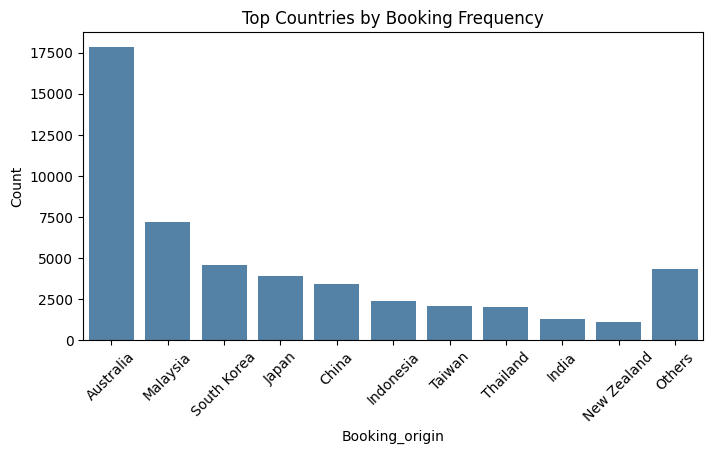

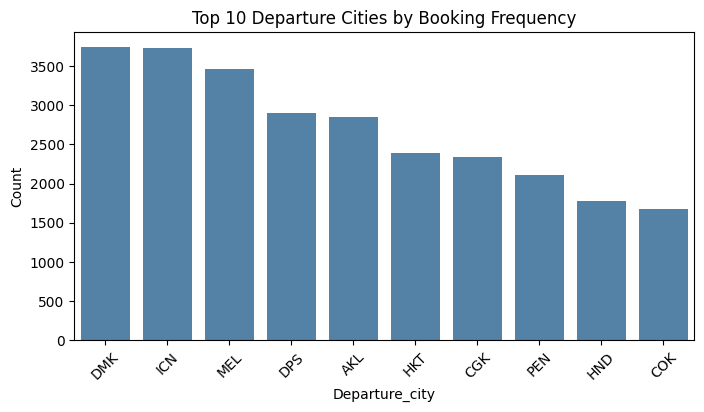

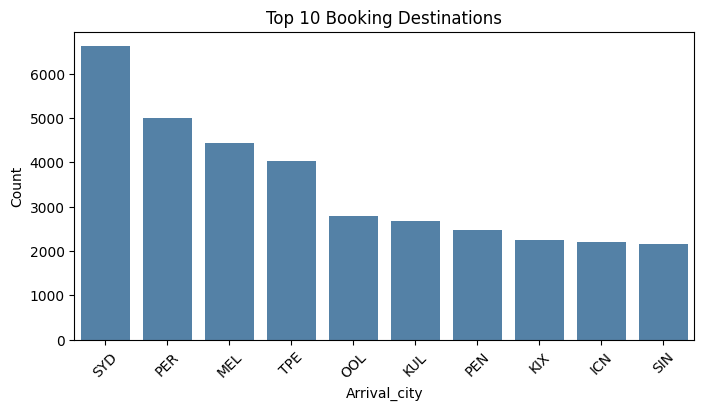

In [19]:
def plot_top_categories(df, column_name, include_others=True, title=''):
    # Count the occurrences of each category
    counts = df[column_name].value_counts()

    # Take top 10 categories
    top_categories = counts[:10].index.tolist()
    top_counts = counts[:10].values

    if include_others:
        # Calculate the 'Others' count by subtracting the sum of the top categories from the total
        others_count = [counts.sum() - top_counts.sum()]
        # Append 'Others' to the list of top categories
        top_categories.append('Others')
        # Append the 'Others' count to the list of top counts
        top_counts = np.append(top_counts, others_count)

    # Create a bar plot
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_categories, y=top_counts, color='steelblue')
    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel(column_name.capitalize())
    plt.xticks(rotation=45)
    plt.show()

# Use the function to create plots for 'booking_origin', 'departure_city', and 'arrival_city'
plot_top_categories(df, 'booking_origin', title='Top Countries by Booking Frequency')
plot_top_categories(df, 'departure_city', include_others=False, title='Top 10 Departure Cities by Booking Frequency')
plot_top_categories(df, 'arrival_city', include_others=False, title='Top 10 Booking Destinations')

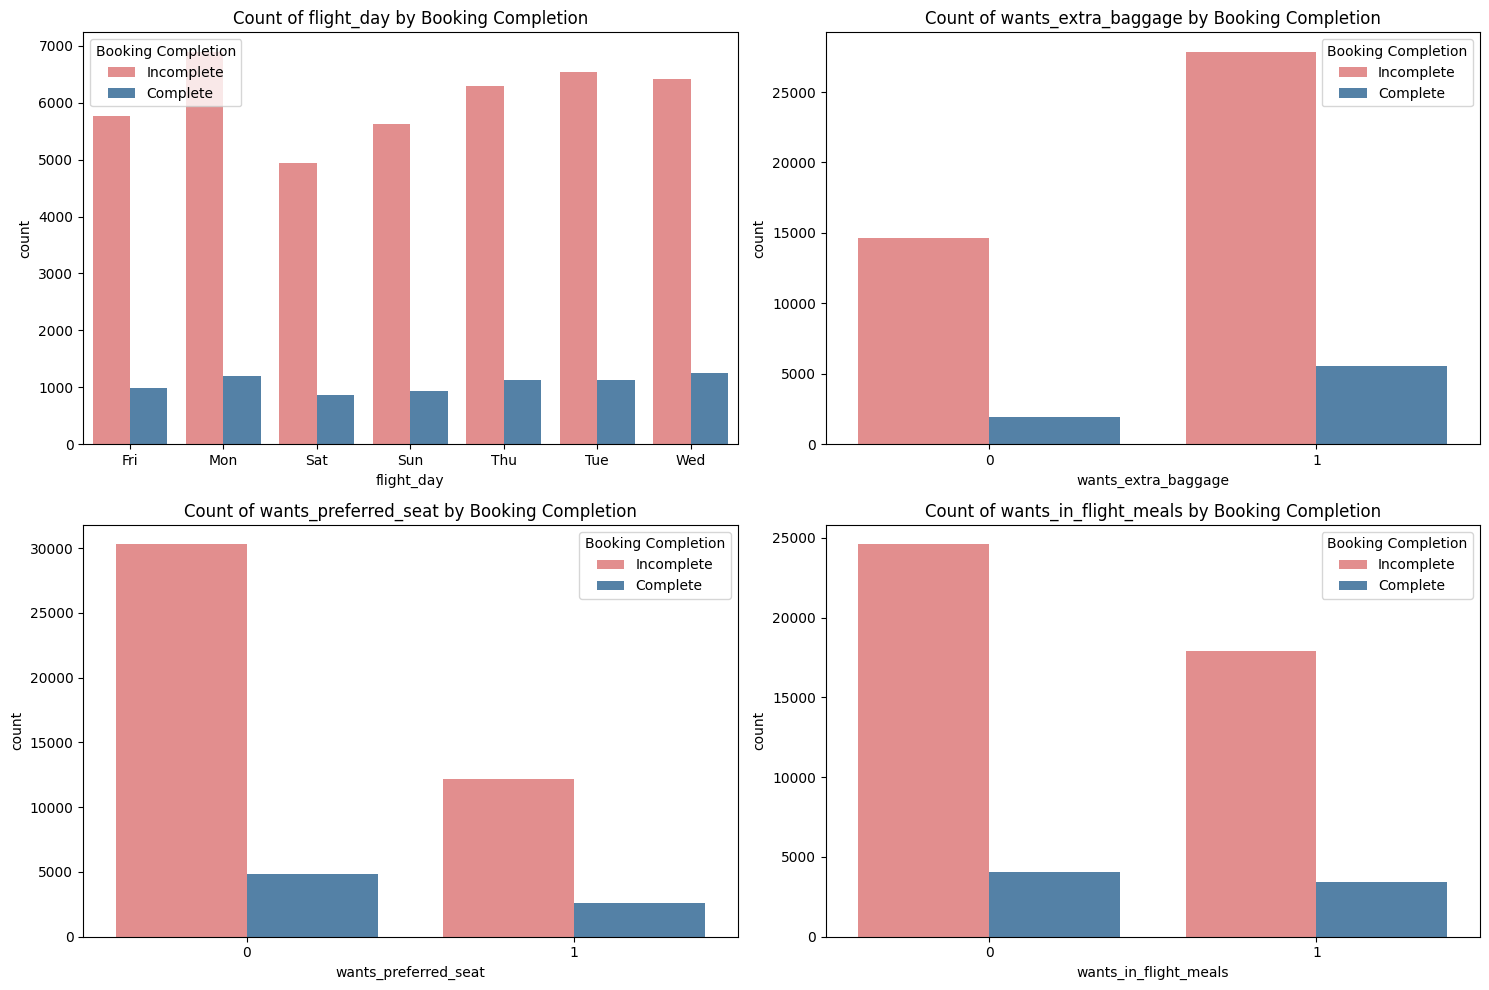

In [20]:
# Bar Charts for Categorical Variables
categorical_columns = ['flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='booking_complete', data=df, palette=colors)
    plt.title(f'Count of {col} by Booking Completion')
    plt.legend(title='Booking Completion', labels=['Incomplete', 'Complete'])
plt.tight_layout()
plt.show()

According to the plot, the most apparent trend is that the desire for extra baggage and in-flight meals is associated with a higher rate of booking completion, while the preference for preferred seats shows a more balanced distribution between completed and incomplete bookings. The flight day does not display a pronounced difference in booking completion rates, suggesting that the day of the flight might not be a decisive factor in the booking process. **So, the variables `wants_preferred_seat` and `flight_day` may be excluded for training the model.**

## Understanding Correlations and Trends



In [21]:
from scipy.stats import pointbiserialr
import scipy.stats as ss

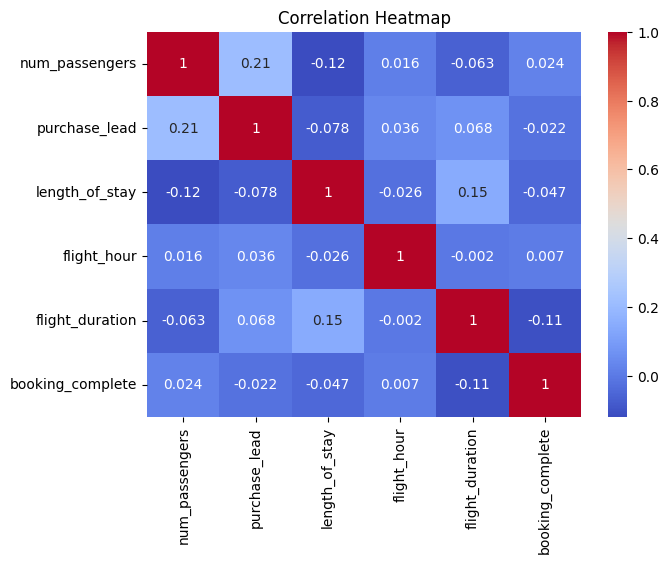

In [22]:
selected_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration', 'booking_complete']
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix reveals that there is a positive correlation between the number of passengers and the purchase lead time, a negative correlation between the number of passengers and length of stay, and a positive correlation between length of stay and flight duration. This suggests that factors influencing booking completion are likely more complex and multifaceted, necessitating further analysis.

In [23]:
# Correlation between target variable and binary categorical columns
correlation_between_wants_extra_baggage = pointbiserialr(df['wants_extra_baggage'], df['booking_complete'])
correlation_between_wants_in_flight_meals = pointbiserialr(df['wants_in_flight_meals'], df['booking_complete'])

print(f"Correlation between wants_extra_baggage and booking_complete: {correlation_between_wants_extra_baggage.correlation} (p-value: {correlation_between_wants_extra_baggage.pvalue})")
print(f"Correlation between wants_in_flight_meals and booking_complete: {correlation_between_wants_in_flight_meals.correlation} (p-value: {correlation_between_wants_in_flight_meals.pvalue})")


Correlation between wants_extra_baggage and booking_complete: 0.06831305467266893 (p-value: 9.149133891661724e-53)
Correlation between wants_in_flight_meals and booking_complete: 0.026607929496295098 (p-value: 2.699626949214836e-09)


In [24]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

nominal_categorical_columns = ['sales_channel', 'flight_day', 'time_of_day',
                               'booking_origin', 'departure_city', 'arrival_city']

# Calculate Cramér's V and p-values
for col in nominal_categorical_columns:
    confusion_matrix = pd.crosstab(df[col], df['booking_complete'])
    chi2_stat, p_value, dof, ex = ss.chi2_contingency(confusion_matrix)
    cramers_v_val = cramers_v(df[col], df['booking_complete'])
    print(f"Cramér's V for {col}: {cramers_v_val}, p-value: {p_value}")


Cramér's V for sales_channel: 0.04082418676514245, p-value: 4.292783192752814e-20
Cramér's V for flight_day: 0.014078234689848205, p-value: 0.014278570370941835
Cramér's V for time_of_day: 0.0335320260516054, p-value: 8.771979789312902e-13
Cramér's V for booking_origin: 0.3023427277813195, p-value: 0.0
Cramér's V for departure_city: 0.2294611019701667, p-value: 0.0
Cramér's V for arrival_city: 0.1971237731734791, p-value: 0.0


## Predictive Model Development

Our approach involves encoding categorical variables and standardizing numerical features to prepare the data for training a RandomForest Classifier. This model will enable us to make accurate predictions regarding booking completion, contributing to our understanding of the underlying factors influencing this behavior.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score


In [26]:
# Removing unwanted columns for modelling
df_model = df.drop(['trip_type', 'flight_day', 'sales_channel', 'time_of_day', 'flight_hour',
               'route', 'wants_preferred_seat'], axis=1)


In [27]:
# Function to perform one-hot encoding with a maximum number of categories
def one_hot_encode_with_others(df, column, max_categories):
    # Get the top categories
    top_categories = df[column].value_counts().index[:max_categories]

    # Replace categories not in the top list with 'Others'
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Others')

    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=[column], prefix=[column], prefix_sep='_')

    return df_encoded

# List of categorical columns and their maximum categories
categorical_columns_max_categories = {
    'booking_origin': 10,
    'departure_city': 20,
    'arrival_city': 20
}

# Perform one-hot encoding for each categorical column with specified maximum categories
for column, max_categories in categorical_columns_max_categories.items():
    df_model = one_hot_encode_with_others(df_model, column, max_categories)

In [28]:
# Standardise numerical columns
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
df_model[numerical_columns] = scaler.fit_transform(df_model[numerical_columns])

In [29]:
df_model.head()

,num_passengers,purchase_lead,length_of_stay,wants_extra_baggage,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_Australia,booking_origin_China,booking_origin_India,...,arrival_city_PER,arrival_city_PNH,arrival_city_PUS,arrival_city_PVG,arrival_city_SBW,arrival_city_SGN,arrival_city_SIN,arrival_city_SYD,arrival_city_TPE,arrival_city_TRZ
0,0.400365,1.957139,-0.118177,1,0,-1.173982,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.579681,0.298877,-0.086967,0,0,-1.173982,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.400365,1.747093,-0.024545,1,0,-1.173982,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,-0.579681,0.121996,0.256351,0,1,-1.173982,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.400365,-0.187546,-0.024545,1,1,-1.173982,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


This is how the final DataFrame looks before training the model: all numerical columns have been standardized, and all categorical columns have been encoded. Now, we will proceed to train the model using **RandomForest**, with `booking_complete` as our target variable.

In [30]:
# Random Forest Classifier
# Separate the target variable (booking_complete) from the features
X = df_model.drop(columns=['booking_complete'])
y = df_model['booking_complete']

# Split the data into training and testing sets with stratified sampling (because of the class imbalance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate predicted probabilities for class 1
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]


In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC-ROC Score: {roc_auc:.2f}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8367
AUC-ROC Score: 0.74
Confusion Matrix:
 [[8047  454]
 [1178  316]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      8501
           1       0.41      0.21      0.28      1494

    accuracy                           0.84      9995
   macro avg       0.64      0.58      0.59      9995
weighted avg       0.80      0.84      0.81      9995



Random Forest classifier achieved an accuracy of **83.67%** and an AUC-ROC score of **0.74**. While the accuracy is relatively high, indicating a strong ability to correctly predict whether a booking will be completed or not, the AUC-ROC score suggests there is room for improvement in distinguishing between the positive and negative classes.  

## Model Performance and Validation



In [ ]:
# Separate the target variable (booking_complete) from the features
X = df_model.drop(columns=['booking_complete'])
y = df_model['booking_complete']

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define hyperparameters and their ranges for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print(f'Best Hyperparameters: {best_params}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Train a new Random Forest model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_rf_classifier.predict(X_test)
y_pred_prob = best_rf_classifier.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Print the evaluation metrics
print(f'Accuracy with Best Model: {accuracy:.4f}')
print(f'AUC-ROC Score: {roc_auc:.2f}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)

Accuracy with Best Model: 0.8508
AUC-ROC Score: 0.78
Confusion Matrix:
 [[8436   65]
 [1426   68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8501
           1       0.51      0.05      0.08      1494

    accuracy                           0.85      9995
   macro avg       0.68      0.52      0.50      9995
weighted avg       0.80      0.85      0.79      9995



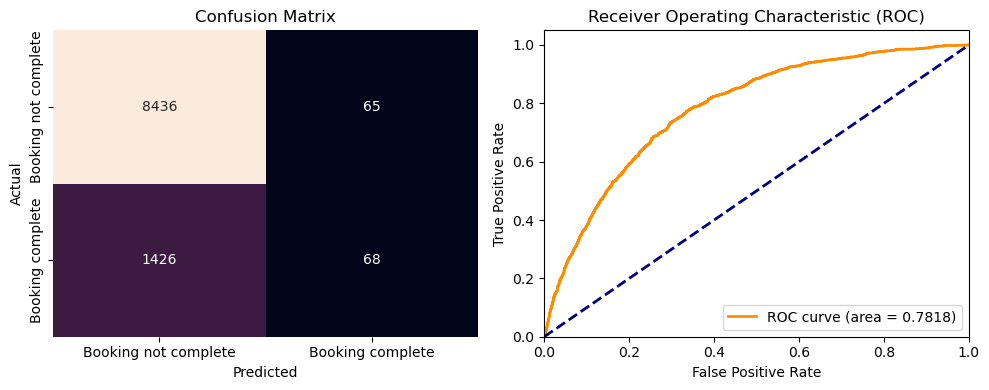

In [ ]:
# Plot confusion matrix and ROC curve

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cbar=False, ax=ax1)

# Customize the Confusion Matrix plot
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_xticks([0.5, 1.5])
ax1.set_yticks([0.5, 1.5])
ax1.set_xticklabels(['Booking not complete', 'Booking complete'])
ax1.set_yticklabels(['Booking not complete', 'Booking complete'])

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC)')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

After cross-validation and hyperparameter tuning, the accuracy improved to **85.08%**. The AUC-ROC score also increased from **0.74** to **0.78**, indicating a good—but not excellent—ability to discriminate between the two classes. The confusion matrix, visualized in the heatmap, illustrates a substantial number of true negatives (8436), confirming the model's strength in correctly identifying non-completions.

## Key Features Influencing Customer Bookings

We now examine the feature importances derived from our Random Forest model. Feature importance scores reveal the relative importance of each predictor in the model, highlighting which factors are most influential in forecasting booking completion. .

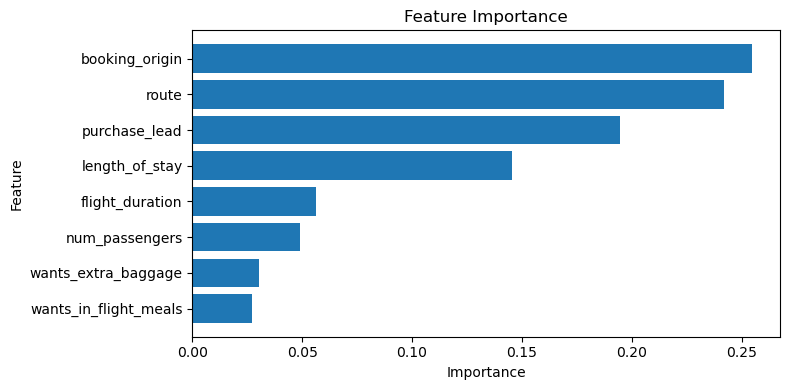

In [ ]:
# Extract importance of each feature from the model
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame to associate importances with column names
importance_df = pd.DataFrame({'Column': X.columns, 'Importance': feature_importances})

# Calculate cumulative sum of importance
booking_origin_cumulative = importance_df[importance_df['Column'].str.startswith('booking')]['Importance'].sum()
arrival_city_cumulative = importance_df[importance_df['Column'].str.startswith('arrival')]['Importance'].sum()
departure_city_cumulative = importance_df[importance_df['Column'].str.startswith('departure')]['Importance'].sum()

cumulative_importance_df = pd.DataFrame({'Column': ['booking_origin', 'route'],
                                         'Importance': [booking_origin_cumulative, (arrival_city_cumulative + departure_city_cumulative)]
                                        })

# Exclude cumulative features from the main importance_df
importance_df = importance_df[~importance_df['Column'].str.startswith('booking')]
importance_df = importance_df[~importance_df['Column'].str.startswith('arrival')]
importance_df = importance_df[~importance_df['Column'].str.startswith('departure')]

# Concatenate importance_df with cumulative_importance_df
importance_df = pd.concat([importance_df, cumulative_importance_df], ignore_index=True)

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the most important features
plt.figure(figsize=(8, 4))
plt.barh(importance_df['Column'][::-1], importance_df['Importance'][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Feature Importance')
plt.tight_layout()
plt.show()

## Conclusion

This comprehensive analysis successfully developed a RandomForest machine learning model to predict customer booking behaviors for British Airways. The model, optimized through grid search and validated with performance metrics, demonstrated a notable accuracy of **85%** and AUC of **0.78**. The study highlighted `booking_origin` and `route` as pivotal factors in booking completion.


